<a href="https://colab.research.google.com/github/UnitForDataScience/ML-DL-Open-Lab-Series/blob/main/Deep_Learning_NNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Breast Cancer Classification with Neural Networks


This tutorial walks through a step-by-step implementation of a neural network to classify **breast cancer tumors** as **benign (0)** or **malignant (1)** using TensorFlow/Keras.

---

## **📝 Key Tasks in This Tutorial**

### **Load and Preprocess Data**
- We use **Breast Cancer Wisconsin dataset** from `sklearn.datasets`.
- Convert dataset into **Pandas DataFrame** for easier handling.
- Split the dataset into **training (80%)** and **testing (20%)**.
- Standardize features using `StandardScaler()` to improve neural network performance.

---

### **Build and Compile Neural Network Model**
A neural network consists of **layers of neurons** (also called nodes). We define:

- **Input layer**: Takes the features from the dataset.
- **Hidden layers**:
  - First layer: `32 neurons` with **ReLU activation**.
  - Second layer: `16 neurons` with **ReLU activation**.
- **Output layer**: `1 neuron` with **Sigmoid activation** (for binary classification).

---

### **Compile the Model**
To train the model, we specify:
- **Loss Function** → `"binary_crossentropy"` (used for binary classification).
- **Optimizer** → `"adam"` (adaptive optimization for better learning).
- **Metrics** → `"accuracy"` (to track performance).

---

### **Train Model**
We train the neural network for `12 epochs`, where:
- The model learns patterns from the training data.
- **Validation data** (20% of training data) helps track overfitting.

---

### **Evaluate Model**
After training, we evaluate the model on **unseen test data** to check:
- **Test Accuracy** → Measures classification performance.
- **Loss** → Measures how well the model generalizes.

---

### **Make Predictions**
- The trained model predicts whether tumors are **benign (0) or malignant (1)**.
- Convert probabilities (`0.5` threshold) into **binary classifications**.

---

### **Visualizing Performance**
- **Training vs. Validation Accuracy Plot** → Helps detect overfitting.
- **Training vs. Validation Loss Plot** → Helps see model convergence.
- **Confusion Matrix** → Shows classification performance.
- **Classification Report** → Provides precision, recall, and F1-score.

---


In [31]:
### import necessary libraries


### data manipulation
import numpy as np
import pandas as pd

### visualization
import matplotlib.pyplot as plt
import seaborn as sns

### SKlearn - model_selection, preprocessing,datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, classification_report

### deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 1. Prepare and Preprocess Data

In [32]:
#### Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target  ### 0 = Benign, 1 = Malignant

In [33]:
### split dataset
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Target']),
                                                    df['Target'], test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Target'])

### standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 2. Building and Compiling Neural Network Model

In [34]:
### define model
model = keras.Sequential([
    layers.Dense(32, activation="relu", input_shape=[X_train.shape[1]]),
    layers.Dense(16, activation="relu"),
     layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

### compile model
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,665 (6.50 KB)

 Trainable params: 1,665 (6.50 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
### Train NN model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=25,
    batch_size=32,
    verbose=1
)

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3561 - loss: 0.7202 - val_accuracy: 0.4176 - val_loss: 0.6063
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3271 - loss: 0.6281 - val_accuracy: 0.4286 - val_loss: 0.5386
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3975 - loss: 0.5522 - val_accuracy: 0.5824 - val_loss: 0.4993
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6191 - loss: 0.5219 - val_accuracy: 0.7033 - val_loss: 0.4726
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7691 - loss: 0.4860 - val_accuracy: 0.8462 - val_loss: 0.4516
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8864 - loss: 0.4829 - val_accuracy: 0.8791 - val_loss: 0.4321
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9537 - loss: 0.4472 - val_accuracy: 0.9451 - val_loss: 0.4072
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9545 - loss: 0.4445 - val_accuracy: 0.9560 - val_los

In [36]:
### model accuracy and loss
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9578 - loss: 0.1089
Test Accuracy: 0.9649


## 3. Training Performance Visualization

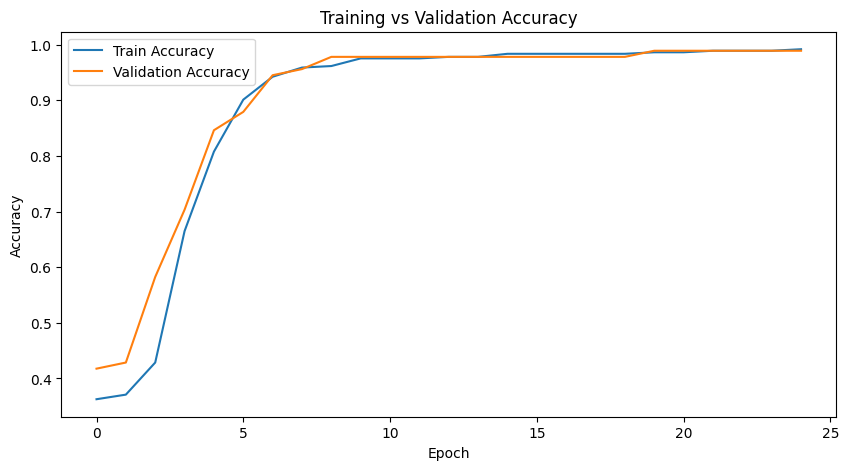

In [37]:
### plot training accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

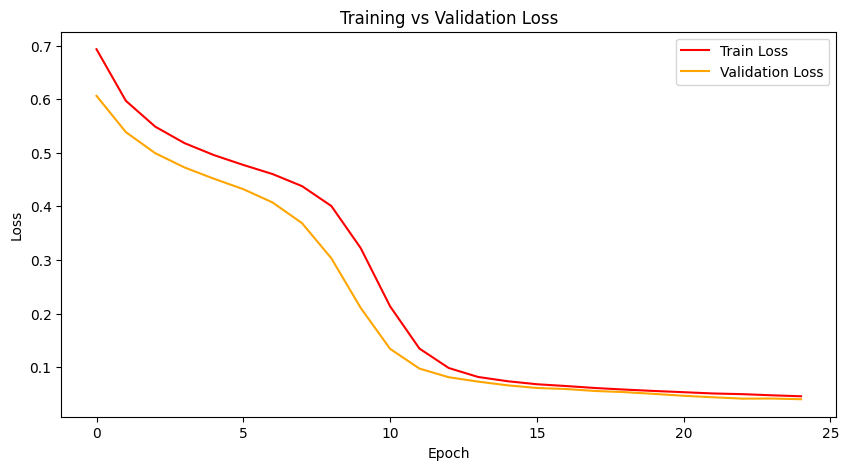

In [38]:
### plot training loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


## 4. Confusion Matrix

In [39]:
### make predictions
predictions = model.predict(X_test_scaled)
predictions_binary = (predictions > 0.5).astype(int)  ### convert to binary

print("Classification Report:", classification_report(y_test, predictions_binary))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Classification Report:               precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



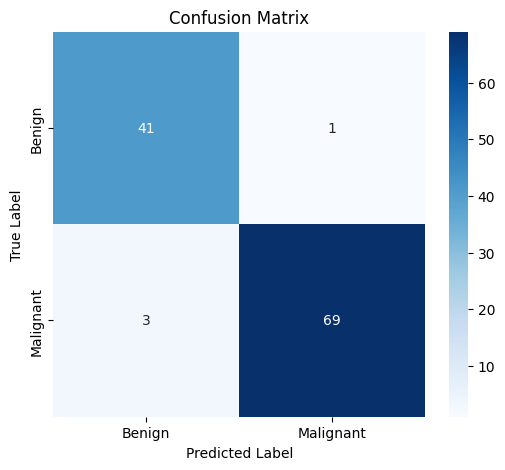

In [40]:
### confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_binary)

### plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()